In [15]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl

In [16]:
# 第一问
Usgs_data = pd.read_csv('./usgs_earthquakes.csv')
df = Usgs_data.sort_values(by="mag" , ascending=False)[0:50]

Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

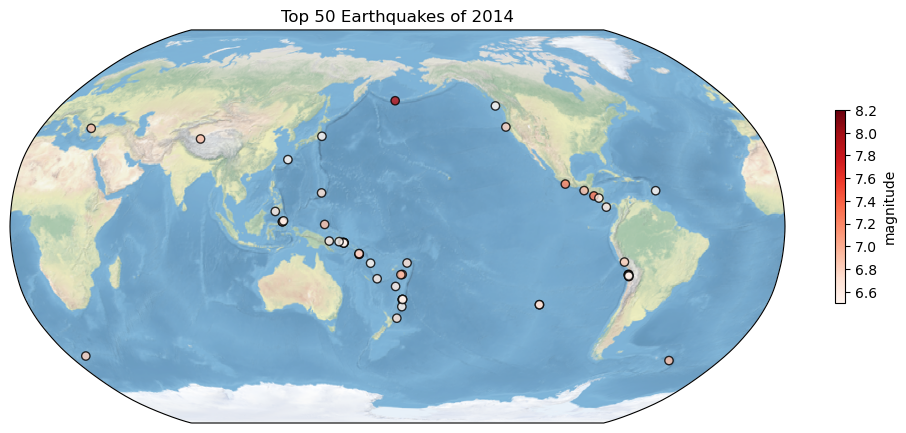

In [19]:
# Create and define the size of a figure object 
fig= plt.figure(figsize=(10,8), dpi=100)
# Create an axes with an Robinson projection style
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global()

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAND)
# cm = plt.cm.get_cmap('hot')
ax.stock_img()
ax.scatter(df.longitude,df.latitude,  
               edgecolors='k',
               c=df.mag, alpha=0.8,cmap = 'Reds',
               transform=ccrs.PlateCarree(),vmin=6.5,vmax=8.2,
               marker='o')
# add color into figure
pos = ax.get_position()
cax = fig.add_axes([pos.xmax+0.05,pos.ymin+0.15,0.01,(pos.ymax-pos.ymin-0.25)])
cbar = mpl.colorbar.ColorbarBase(cax,norm=mpl.colors.Normalize(6.5,8.2),ticks=list(np.linspace(6.6,8.2,9)),orientation='vertical'
                                ,cmap=plt.cm.get_cmap('Reds'))
cbar.ax.set_ylabel('magnitude')
ax.set_title('Top 50 Earthquakes of 2014')

In [53]:
# 第二题 第一问
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText


ds = xr.open_dataset('air.sig007.2010.nc')
ds

/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 366)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        mean daily NMC reanalysis (2012)
    history:      created 2011/12 by Hoop (netCDF2.3)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = li

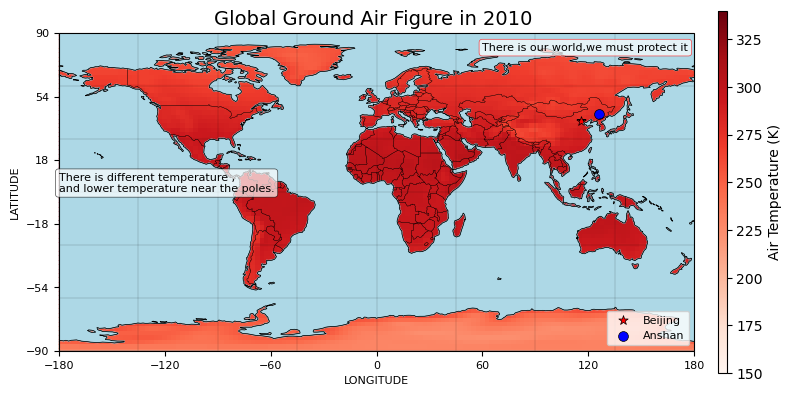

In [83]:
#a project
plt.figure(figsize=(10,6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
# marks and feature
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))
# plot figure and color
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='Reds',vmin=150,vmax=340,add_colorbar=True,
                         cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})
# add a title
ax.set_title("Global Ground Air Figure in 2010 ",fontsize=14)

# add gridlines 
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.1, color='black', alpha=1)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 45))


# x label and ticks
ax.tick_params(labelsize=8)
ax.set_xticks(np.linspace(-180, 180, 7))
ax.set_xlabel('LONGITUDE',fontsize=8)
# y label and ticks
ax.set_yticks(np.linspace(-90, 90, 6))
ax.set_ylabel('LATITUDE',fontsize=8)
# text box
ax.text(-180,0,'There is different temperature ,\nand lower temperature near the poles.',
         fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
ax.text(60,80,'There is our world,we must protect it',
         fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red',lw=0.5 ,alpha=0.7))
# annotations
ax.add_feature(cfeature.OCEAN, facecolor='lightblue',zorder=1)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5,zorder=2)
# legend
ax.scatter(116,40,s=50,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5)
ax.scatter(126,44,s=50,c='b',marker='o',label='Anshan',edgecolors='k', linewidths=0.5)
ax.legend(loc='lower right',fontsize=8)

In [84]:
#第二题 第二问

In [85]:
# Create and define the size of a figure object of shenzhen 
plt.figure(figsize=(18,6), dpi=300)
shenzhen_lon, shenzhen_lat = 114.06, 22.54 

<Figure size 5400x1800 with 0 Axes>

/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/zcjysustech/opt/anaconda3/envs/ese5023/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = li

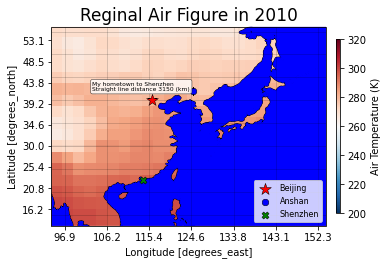

In [91]:
# a different project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)   #默认步骤
ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,40)),ylocs=list(np.linspace(-90,90,37)),
                  linewidth=0.5, color='black', alpha=0.3,zorder=3)
# x label and ticks
ax.set_xticks(np.linspace(-180, 180, 40))
ax.set_xlabel('Longitude ',fontsize=10)
# y label and ticks
ax.set_yticks(np.linspace(-90,90, 40))
ax.set_xlabel('latitude ',fontsize=10)
#plot extend area 
extent = [shenzhen_lon-20, shenzhen_lon+40, shenzhen_lat-10, shenzhen_lat+30]
ax.set_extent(extent)
# mask and features
ax.add_feature(cfeature.OCEAN, facecolor='blue', zorder=2)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=2)
# add gridlines 
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.1, color='black', alpha=1)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 45))
# legend
ax.scatter(116,40,s=150,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5,zorder=5)
ax.scatter(125,42,s=50,c='b',marker='8',label='Anshan',edgecolors='k', linewidths=0.5,zorder=3)
ax.scatter(114.06,22.54,s=50,c='g',marker='X',label='Shenzhen',edgecolors='k', linewidths=0.5,zorder=4)
ax.legend(loc='lower right',fontsize=8)
# plot colorbar
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='RdBu_r',vmin=200,vmax=320,
            add_colorbar=True,cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})
# add a title
ax.set_title("Reginal Air Figure in 2010",fontsize=17)
# add  text box
ax.text(103,42,'My hometown to Shenzhen\nStraight line distance 3150 (km)',c='k',fontsize=6,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.8))
plt.show()